In [1]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()
#60000 records of training data
X_train.shape

(60000, 28, 28)

In [3]:
values, counts = np.unique(Y_train, return_counts=True)
print(values, counts)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


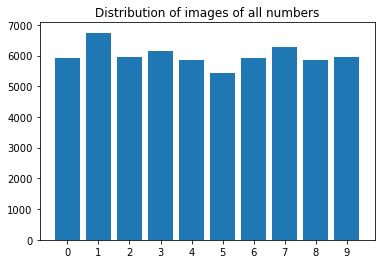

In [4]:
plt.bar(values, counts)
plt.title('Distribution of images of all numbers')
plt.xticks(np.arange(min(values), max(values)+1, 1.0))
plt.show()

In [5]:
#Each image is a matrix of 28 * 28 pixels
X_train[0].shape

(28, 28)

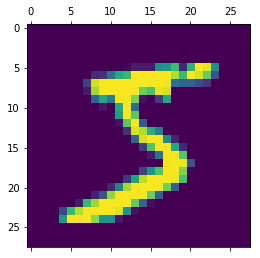

In [6]:
#Check to see number the first image corresponds to? 5.
plt.matshow(X_train[0])

In [7]:
#Flatten matrix and normalize values
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')
X_train/=255
X_test/=255

In [8]:
#Map all digits (0-9) to their one-hot encoding
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#plot_model(model, to_file='model.png')

In [ ]:
# Fit the model
model.fit(X_train, Y_train, epochs=2, batch_size=1, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/2
60000/60000 [==============================] - 231s - loss: 0.2043 - acc: 0.9380   
Epoch 2/2
11460/60000 [====>.........................] - ETA: 209s - loss: 0.0943 - acc: 0.9716

In [ ]:
print(Y_train[0])

In [ ]:
model.predict(np.array([X_train[0]]))